segments => 35,651

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA = '/content/drive/MyDrive/Colab Notebooks/p008848.mat'

print(DATA)

/content/drive/MyDrive/Colab Notebooks/p008848.mat


key 확인

In [ ]:
import h5py
MAT_PATH = '/content/drive/MyDrive/Colab Notebooks/p008848.mat'

with h5py.File(MAT_PATH, 'r') as f:
    print("Top-level keys:", list(f.keys()))
    print("Contains #refs#?", '#refs#' in f)

Top-level keys: ['#refs#', 'Subj_Wins']
Contains #refs#? True


In [ ]:
import h5py, numpy as np

MAT_PATH = "/content/drive/MyDrive/Colab Notebooks/p008848.mat"

with h5py.File(MAT_PATH, 'r') as f:
    SW = f['Subj_Wins']
    ppg_refs = SW['PPG_F'][0]
    sbp_refs = SW['SegSBP'][0]
    dbp_refs = SW['SegDBP'][0]

    segments = len(ppg_refs)
    print("세그먼트 수:", segments)

    tmp_sbp = [float(f[sbp_refs[i]][()][0][0]) for i in range(min(5, segments))]
    tmp_dbp = [float(f[dbp_refs[i]][()][0][0]) for i in range(min(5, segments))]
    print("샘플 SBP:", tmp_sbp)
    print("샘플 DBP:", tmp_dbp)

    scale_div = 100.0 if (np.mean(tmp_sbp) > 300 or np.mean(tmp_dbp) > 300) else 1.0


세그먼트 수: 3241
샘플 SBP: [88.7290460225541, 95.1295336787565, 93.62389515391651, 96.23704663212435, 93.65932642487046]
샘플 DBP: [56.48887534288326, 59.201462968607125, 59.60377933556841, 60.42098445595854, 59.29404145077719]


시각화

SBP mean/min/max: 103.24/83.63/116.30
DBP mean/min/max: 62.17/47.33/71.66
길이: (3241,) (3241,)


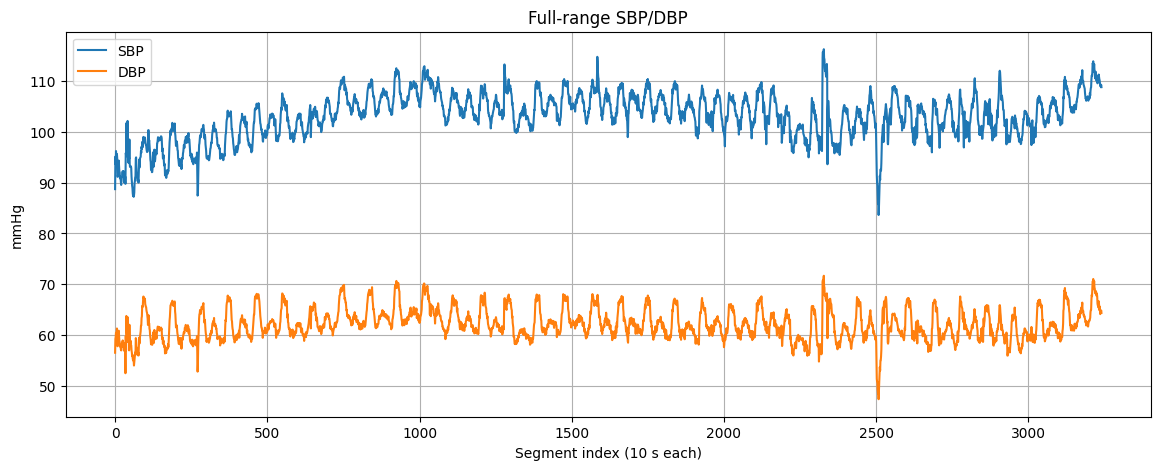

In [ ]:
import h5py, numpy as np, matplotlib.pyplot as plt

with h5py.File(MAT_PATH, 'r') as f:
    SW = f['Subj_Wins']
    ppg_refs = SW['PPG_F'][0]
    sbp_refs = SW['SegSBP'][0]
    dbp_refs = SW['SegDBP'][0]
    segments = len(ppg_refs)

    sbp = np.array([float(f[sbp_refs[i]][()][0][0]) for i in range(segments)], dtype=float)
    dbp = np.array([float(f[dbp_refs[i]][()][0][0]) for i in range(segments)], dtype=float)

if np.mean(sbp) > 300 or np.mean(dbp) > 300:
    sbp = sbp/100.0
    dbp = dbp/100.0

print(f"SBP mean/min/max: {sbp.mean():.2f}/{sbp.min():.2f}/{sbp.max():.2f}")
print(f"DBP mean/min/max: {dbp.mean():.2f}/{dbp.min():.2f}/{dbp.max():.2f}")
print("길이:", sbp.shape, dbp.shape)
x = np.arange(segments)
plt.figure(figsize=(14,5))
plt.plot(x, sbp, label='SBP')
plt.plot(x, dbp, label='DBP')
plt.xlabel('Segment index (10 s each)')
plt.ylabel('mmHg')
plt.title('Full-range SBP/DBP')
plt.grid(True); plt.legend(); plt.show()


Fold 5


In [ ]:
import numpy as np

N = len(sbp)
fold_size = N // 5
print("전체 세그:", N, "| fold당 세그:", fold_size)

folds = []
for i in range(5):
    start = i * fold_size
    end = (i+1) * fold_size if i < 4 else N
    folds.append((start, end))
    print(f"Fold {i+1}: {start} ~ {end-1} ({end-start}개)")


train_n, val_n, test_n = 320, 40, 40
fold1_start, fold1_end = folds[0]
train_idx = np.arange(fold1_start, fold1_start+train_n)
val_idx   = np.arange(fold1_start+train_n, fold1_start+train_n+val_n)
test_idx  = np.arange(fold1_start+train_n+val_n, fold1_start+train_n+val_n+test_n)

print(f"\nFold1 → train={len(train_idx)}, val={len(val_idx)}, test={len(test_idx)}")


전체 세그: 3241 | fold당 세그: 648
Fold 1: 0 ~ 647 (648개)
Fold 2: 648 ~ 1295 (648개)
Fold 3: 1296 ~ 1943 (648개)
Fold 4: 1944 ~ 2591 (648개)
Fold 5: 2592 ~ 3240 (649개)

Fold1 → train=320, val=40, test=40


fold 시각화

Fold 1: 0 ~ 647 (648개)
Fold 2: 648 ~ 1295 (648개)
Fold 3: 1296 ~ 1943 (648개)
Fold 4: 1944 ~ 2591 (648개)
Fold 5: 2592 ~ 3240 (649개)


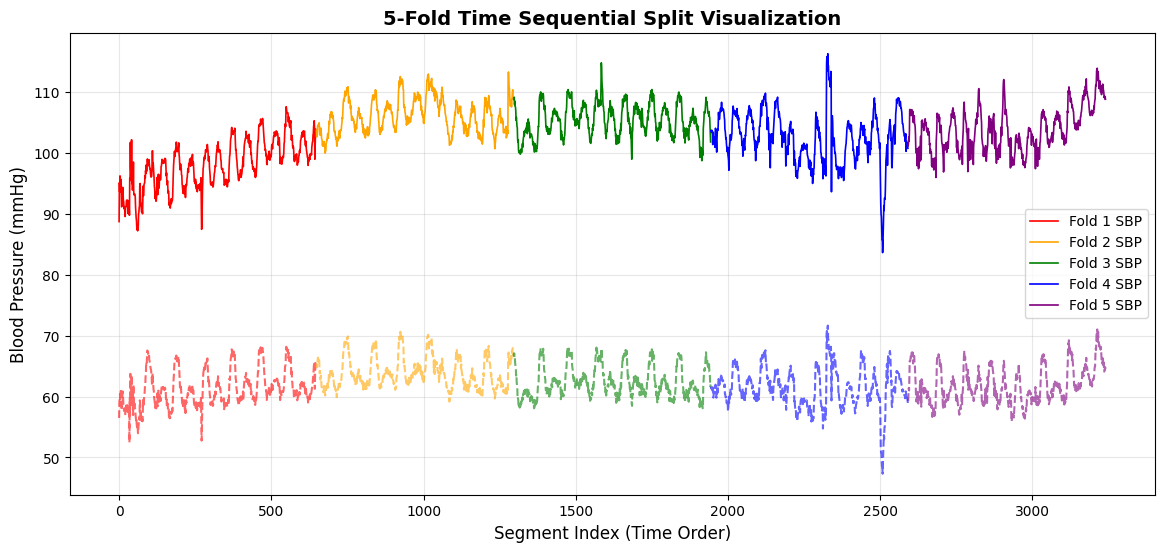

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = len(sbp)
fold_size = N // 5
folds = []
for i in range(5):
    start = i * fold_size
    end = (i+1) * fold_size if i < 4 else N
    folds.append((start, end))
    print(f"Fold {i+1}: {start} ~ {end-1} ({end-start}개)")

plt.figure(figsize=(14,6))
x = np.arange(N)

colors = ['red', 'orange', 'green', 'blue', 'purple']
for i,(s,e) in enumerate(folds):
    plt.plot(x[s:e], sbp[s:e], color=colors[i], linewidth=1.2, label=f'Fold {i+1} SBP')
    plt.plot(x[s:e], dbp[s:e], color=colors[i], linestyle='--', alpha=0.6)

plt.xlabel('Segment Index (Time Order)', fontsize=12)
plt.ylabel('Blood Pressure (mmHg)', fontsize=12)
plt.title('5-Fold Time Sequential Split Visualization', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Subj_Wins하위
-PPG_F : 손끝 센서 측정된 파형
-ECG_F : 심전도 파형
-segSBP : 수축기혈압 값의 세그먼트
-segDBP : 이완기혈압 값의 세그먼트

환자의 혈압, 맥박, 심전도 값을 10초 단위(세그먼트) 로 저장되있음.


입력 X: [PPG(1250샘플), ECG(1250샘플)]  →  출력 y: [SBP, DBP]


입력 (X)	PPG + ECG 파형 10초	(1250, 2)
정답 (y)	SBP, DBP 실측값	(2,)

CNN + TRANSFORMER
CNN -> TCN -> 완전연결계층

In [ ]:
with h5py.File(MAT_PATH, 'r') as f:
    SW = f['Subj_Wins']
    ppg_refs = SW['PPG_F'][0]
    ecg_refs = SW['ECG_F'][0]
    sbp_refs = SW['SegSBP'][0]
    dbp_refs = SW['SegDBP'][0]
    N = len(ppg_refs)

    sbp = np.array([float(f[sbp_refs[i]][()][0][0]) for i in range(N)])
    dbp = np.array([float(f[dbp_refs[i]][()][0][0]) for i in range(N)])
    if np.mean(sbp) > 300: sbp /= 100; dbp /= 100

print(f"세그먼트: {N}, SBP {sbp.mean():.1f}, DBP {dbp.mean():.1f}")

folds = []
fold_size = N // 5
for i in range(5):
    start, end = i*fold_size, (i+1)*fold_size if i<4 else N
    folds.append((start,end))

세그먼트: 3241, SBP 103.2, DBP 62.2


In [ ]:
def load_segments(mat_path, idxs):
    import h5py, numpy as np
    X = []
    with h5py.File(mat_path, 'r') as f:
        SW = f['Subj_Wins']
        ppg_refs, ecg_refs = SW['PPG_F'][0], SW['ECG_F'][0]
        for i in idxs:
            ppg = np.array(f[ppg_refs[i]][()]).squeeze().astype(np.float32)
            ecg = np.array(f[ecg_refs[i]][()]).squeeze().astype(np.float32)
            X.append(np.stack([ppg, ecg], axis=-1))
    X = np.stack(X, axis=0)
    return X

def zscore_seg_channel(X):
    mean = X.mean(axis=1, keepdims=True)
    std  = X.std(axis=1, keepdims=True) + 1e-6
    return (X - mean) / std

파형 + 이완/수축 시각화.비교

/tmp/ipython-input-3097506161.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


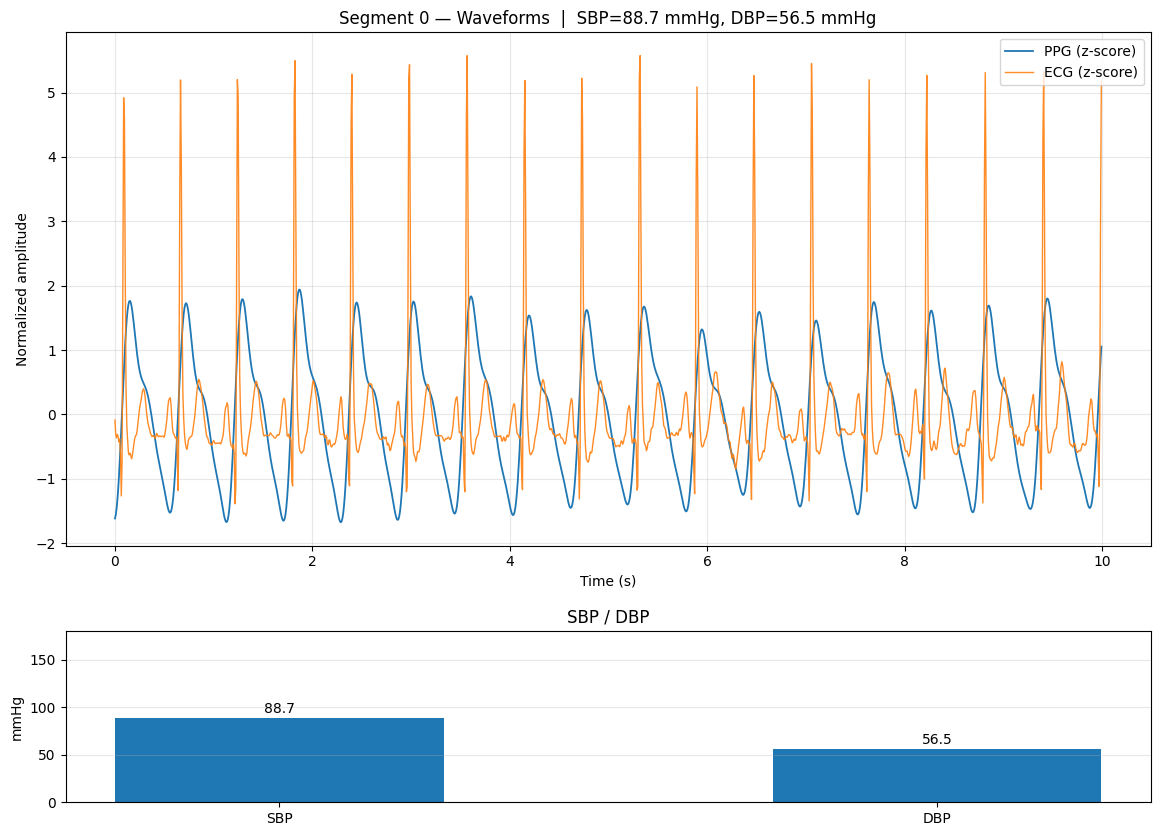

In [ ]:
import h5py, numpy as np, matplotlib.pyplot as plt

def plot_segment_with_bp(mat_path, sample_idx=0, fs=125):
    with h5py.File(mat_path, 'r') as f:
        SW = f['Subj_Wins']
        ppg_refs = SW['PPG_F'][0]
        ecg_refs = SW['ECG_F'][0] if 'ECG_F' in SW else None
        sbp_refs = SW['SegSBP'][0]
        dbp_refs = SW['SegDBP'][0]
        N = len(ppg_refs)
        assert 0 <= sample_idx < N, f"sample_idx는 0~{N-1} 범위여야 합니다."

        ppg = np.array(f[ppg_refs[sample_idx]][()]).squeeze().astype(np.float32)
        ecg = None
        if ecg_refs is not None:
            ecg = np.array(f[ecg_refs[sample_idx]][()]).squeeze().astype(np.float32)

        sbp = float(f[sbp_refs[sample_idx]][()][0][0])
        dbp = float(f[dbp_refs[sample_idx]][()][0][0])
        if (sbp > 300) or (dbp > 300):
            sbp /= 100.0
            dbp /= 100.0

        t = np.arange(len(ppg)) / fs

        def zscore(x):
            x = x.astype(np.float32)
            m, s = x.mean(), x.std() + 1e-6
            return (x - m) / s

        ppg_z = zscore(ppg)
        ecg_z = zscore(ecg) if ecg is not None else None

        fig = plt.figure(figsize=(14, 10))
        gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0.25)

        ax1 = fig.add_subplot(gs[0, 0])
        ax1.plot(t, ppg_z, label='PPG (z-score)', linewidth=1.3)
        if ecg_z is not None:
            ax1.plot(t, ecg_z, label='ECG (z-score)', linewidth=1.0, alpha=0.9)
        ax1.set_title(f"Segment {sample_idx} — Waveforms  |  SBP={sbp:.1f} mmHg, DBP={dbp:.1f} mmHg")
        ax1.set_xlabel("Time (s)")
        ax1.set_ylabel("Normalized amplitude")
        ax1.grid(True, alpha=0.3)
        ax1.legend(loc='upper right')

        ax2 = fig.add_subplot(gs[1, 0])
        ax2.bar(['SBP','DBP'], [sbp, dbp], width=0.5)
        ax2.set_ylabel("mmHg")
        ax2.set_ylim(0, max(180, sbp*1.2))
        ax2.set_title("SBP / DBP")
        ax2.grid(True, axis='y', alpha=0.3)

        for i, v in enumerate([sbp, dbp]):
            ax2.text(i, v + max(2, v*0.02), f"{v:.1f}", ha='center', va='bottom', fontsize=10)

        plt.tight_layout()
        plt.show()

plot_segment_with_bp(MAT_PATH, sample_idx=0, fs=125)


모델
CNN + transformer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

class SinePositionalEncoding(layers.Layer):
    def call(self, x):
        x = tf.convert_to_tensor(x)
        dtype = x.dtype

        T = tf.shape(x)[1]
        C = tf.shape(x)[2]

        pos = tf.cast(tf.range(T)[:, None], dtype)
        i   = tf.cast(tf.range(C)[None, :], dtype)
        C_f = tf.cast(C, dtype)

        angle_rates = 1.0 / tf.pow(tf.constant(10000.0, dtype=dtype), (2.0 * tf.floor(i/2.0)) / C_f)
        angle = pos * angle_rates

        sin = tf.sin(angle[:, 0::2])
        cos = tf.cos(angle[:, 1::2])

        pe = tf.concat([sin, cos], axis=-1)
        pe = pe[None, :, :C]

        return x + pe


In [ ]:
import numpy as np, h5py, gc, time
import tensorflow as tf
import tensorflow as tf, time, os, gc
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Dropout
from tensorflow.keras.layers import GlobalAveragePooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

print("TF:", tf.__version__)
print("GPU", tf.config.list_physical_devices('GPU'))
for g in tf.config.list_physical_devices('GPU'):
  try:
    tf.config.experimental.set_memory_growth(g, True)
  except: pass

es = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

def zscore_seg_channel(X):
  X = X.astype('float32')
  m = X.mean(axis=1, keepdims=True)
  sd = X.std(axis=1, keepdims=True) + 1e-6
  return (X - m) / sd

scaler_y = StandardScaler()

TF: 2.19.0
GPU []


콜백

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
es  = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

In [ ]:
def load_segments(mat_path, idxs):
    X = []
    with h5py.File(mat_path, 'r') as f:
        SW = f['Subj_Wins']
        ppg_refs = SW['PPG_F'][0]
        ecg_refs = SW['ECG_F'][0] if 'ECG_F' in SW else None
        for i in idxs:
            ppg = np.array(f[ppg_refs[i]][()]).squeeze().astype(np.float32)
            if ecg_refs is None:
                x = ppg[:, None]
            else:
                ecg = np.array(f[ecg_refs[i]][()]).squeeze().astype(np.float32)
                x = np.stack([ppg, ecg], axis=-1)
            X.append(x)
    return np.stack(X, axis=0)

In [ ]:

def make_tcn_sequential(input_length=1250, channels=2, base=32, dropout=0.1, lr=3e-4):
    model = Sequential()
    model.add(Input(shape=(input_length, channels)))

    model.add(Conv1D(base, 7, strides=2, padding='same'))
    model.add(BatchNormalization()); model.add(Activation('relu'))

    for d in [1, 2, 4, 8, 16]:
        model.add(Conv1D(base, 3, padding='causal', dilation_rate=d))
        model.add(BatchNormalization()); model.add(Activation('relu'))
        model.add(Dropout(dropout))

    model.add(GlobalAveragePooling1D())
    model.add(Dense(64)); model.add(Activation('relu')); model.add(Dropout(dropout))
    model.add(Dense(2))

    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss=tf.keras.losses.Huber(delta=5.0))
    return model


In [ ]:
from math import sqrt

train_n, val_n, test_n = 320, 40, 40
results = []

FOLDS_TO_RUN = range(5)
DIM_BASE = 32
LR = 3e-4
DROPOUT = 0.1
EPOCHS = 20
BATCH = 128

for k, (start, end) in enumerate(folds):
    if k not in FOLDS_TO_RUN:
        continue

    idx_train = np.arange(start, start+train_n)
    idx_val   = np.arange(start+train_n, start+train_n+val_n)
    idx_test  = np.arange(start+train_n+val_n, start+train_n+val_n+test_n)
    idx_train, idx_val, idx_test = [x[x < end] for x in [idx_train, idx_val, idx_test]]

    t0 = time.time()
    Xtr = load_segments(MAT_PATH, idx_train).astype('float32')
    Xva = load_segments(MAT_PATH, idx_val).astype('float32')
    Xte = load_segments(MAT_PATH, idx_test).astype('float32')

    Xtr = zscore_seg_channel(Xtr)
    Xva = zscore_seg_channel(Xva)
    Xte = zscore_seg_channel(Xte)

    ytr_raw = np.stack([sbp[idx_train], dbp[idx_train]], axis=1).astype('float32')
    yva_raw = np.stack([sbp[idx_val],   dbp[idx_val]],   axis=1).astype('float32')
    yte_raw = np.stack([sbp[idx_test],  dbp[idx_test]],  axis=1).astype('float32')

    ytr = scaler_y.fit_transform(ytr_raw)
    yva = scaler_y.transform(yva_raw)
    yte = scaler_y.transform(yte_raw)

    print(f"[Fold{k+1}] data ready {time.time()-t0:.2f}s | Xtr{Xtr.shape} ytr{ytr.shape}")

    model = make_tcn_sequential(input_length=Xtr.shape[1], channels=Xtr.shape[2],
                                base=DIM_BASE, dropout=DROPOUT, lr=LR)

    hist = model.fit(
        Xtr, ytr,
        validation_data=(Xva, yva),
        epochs=EPOCHS,
        batch_size=BATCH,
        callbacks=[es, rlr],
        verbose=1
    )

    y_pred_scaled = model.predict(Xte, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = yte_raw

    mae_sbp  = float(np.mean(np.abs(y_pred[:,0] - y_true[:,0])))
    rmse_sbp = float(np.sqrt(np.mean((y_pred[:,0] - y_true[:,0])**2)))
    mae_dbp  = float(np.mean(np.abs(y_pred[:,1] - y_true[:,1])))
    rmse_dbp = float(np.sqrt(np.mean((y_pred[:,1] - y_true[:,1])**2)))

    print(f"[Fold{k+1}] SBP MAE={mae_sbp:.2f} RMSE={rmse_sbp:.2f} | DBP MAE={mae_dbp:.2f} RMSE={rmse_dbp:.2f}")
    results.append([mae_sbp, rmse_sbp, mae_dbp, rmse_dbp])

    del Xtr, Xva, Xte, ytr, yva, yte, ytr_raw, yva_raw, yte_raw, y_pred, y_pred_scaled, model, hist
    gc.collect()

[Fold1] data ready 0.36s | Xtr(320, 1250, 2) ytr(320, 2)
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 985ms/step - loss: 0.6080 - val_loss: 0.3220 - learning_rate: 3.0000e-04
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.5640 - val_loss: 0.3176 - learning_rate: 3.0000e-04
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 913ms/step - loss: 0.5665 - val_loss: 0.3140 - learning_rate: 3.0000e-04
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 526ms/step - loss: 0.5370 - val_loss: 0.3102 - learning_rate: 3.0000e-04
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step - loss: 0.5409 - val_loss: 0.3072 - learning_rate: 3.0000e-04
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 552ms/step - loss: 0.5102 - val_loss: 0.3047 - learning_rate: 3.0000e-04
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 695ms/step - loss: 0.4973 - val_loss: 0.3021 - learning_rate: 3.0000e-04
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 850ms/step - loss: 0.4824 - val_loss: 0.2993 - learning_rate: 3.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 515ms/step

In [ ]:
if len(results) > 0:
    arr = np.array(results)
    mean, std = arr.mean(axis=0), arr.std(axis=0)
    print("\n=== Summary (TCN-lite, Sequential) ===")
    print(f"SBP  MAE {mean[0]:.2f} ± {std[0]:.2f} | RMSE {mean[1]:.2f} ± {std[1]:.2f}")
    print(f"DBP  MAE {mean[2]:.2f} ± {std[2]:.2f} | RMSE {mean[3]:.2f} ± {std[3]:.2f}")


=== Summary (TCN-lite, Sequential) ===
SBP  MAE 4.10 ± 1.70 | RMSE 4.65 ± 1.75
DBP  MAE 3.37 ± 1.01 | RMSE 3.93 ± 1.01
